In [14]:
# Ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

In [15]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# importing the dataset
data = pd.read_csv('IMDB-Movie-Data.xlsx.csv')
data.head()

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074,333.13
1,2,Prometheus,Adventure,Ridley Scott,2012,124,7.0,485820,126.46
2,3,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606,138.12
3,4,Sing,Animation,Christophe Lourdelet,2016,108,7.2,60545,270.32
4,5,Suicide Squad,Action,David Ayer,2016,123,6.2,393727,325.02


In [17]:
# No of rows and columns
x, y = data.shape
print(f'The data has {x} rows and {y} columns.')

The data has 1000 rows and 9 columns.


In [18]:
# Number of missing values
data.isnull().sum()

ID                    0
Title                 0
Genre                 0
Director              0
Year                  0
Runtime_minutes       0
Rating                0
Votes                 0
Revenue_millions    128
dtype: int64

In [19]:
# Finding number of features
num, cat = 0, 0
for cols in data:
    if data.dtypes[cols] == 'O':
        cat += 1
    else:
        num +=1

print(f'There are {num} numerical variables and {cat} categorical variables')

There are 6 numerical variables and 3 categorical variables


In [7]:
# Column names
print(data.columns)

Index(['ID', 'Title', 'Genre', 'Director', 'Year', 'Runtime_minutes', 'Rating',
       'Votes', 'Revenue_millions'],
      dtype='object')


In [20]:
# Dataframe for datatype
data_type = pd.DataFrame(data.dtypes, columns=['data_type'])

# Dataframe for unique count
unique_count = pd.DataFrame(data.nunique(), columns=['unique_count'])

# Concatinating the above dataframe
data_concat = pd.concat([data_type, unique_count], axis=1)
data_concat

,data_type,unique_count
ID,int64,1000
Title,object,999
Genre,object,13
Director,object,644
Year,int64,11
Runtime_minutes,int64,94
Rating,float64,55
Votes,int64,997
Revenue_millions,float64,814


In [24]:
#75th percentile of rating
data['Rating'].quantile([0.25, 0.5, 0.75])

0.25    6.2
0.50    6.8
0.75    7.4
Name: Rating, dtype: float64

In [29]:
#How many NA values are there in the field ‘Revenue’?

data['Revenue_millions'].isnull().sum()

128

# Data slicing:

We need to slice and dice the data to get a fair understanding of top earning movies, underrated movies and some additional statistics such as yearly revenue and average ratings.

In [34]:
#How many movies have revenue higher than 75 million?

data.iloc[list(data['Revenue_millions']>75),[1]].count()

Title    318
dtype: int64

In [42]:
#How many movies have revenue greater than 50 million but rating less than 7?

data[(data['Revenue_millions']>50) & (data['Rating']<7)]['Title'].count()

211

In [48]:
#What is the total revenue generated by movies in the year 2015?

round(data[data['Year']==2015]['Revenue_millions'].sum(),2)

8854.12

In [54]:
# What is the average rating for the genre adventure in the year 2015?

data[(data['Genre']=='Adventure')&(data['Year']==2015)]['Rating'].mean()

6.8

In [74]:
#What is the average duration of movies in rows 75 to 150? Please note that the rows in python start from 0.

round(data.iloc[75:151,[5]].mean(),2)

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
75,76,Pirates of the Caribbean: At World's End,Action,Gore Verbinski,2007,169,7.1,498821,309.40
76,77,The Avengers,Action,Joss Whedon,2012,143,8.1,1045588,623.28
77,78,Inglourious Basterds,Adventure,Quentin Tarantino,2009,153,8.3,959065,120.52
78,79,Pirates of the Caribbean: Dead Man's Chest,Action,Gore Verbinski,2006,151,7.3,552027,423.03
79,80,Ghostbusters,Action,Paul Feig,2016,116,5.3,147717,128.34
...,...,...,...,...,...,...,...,...,...
146,147,The Edge of Seventeen,Comedy,Kelly Fremon Craig,2016,104,7.4,47694,14.26
147,148,Watchmen,Action,Zack Snyder,2009,162,7.6,410249,107.50
148,149,Superbad,Comedy,Greg Mottola,2007,113,7.6,442082,121.46
149,150,Inferno,Action,Ron Howard,2016,121,6.2,97623,34.26


In [128]:
# Which year generated the highest revenue?
data.groupby('Year',as_index=False).sum('Revenue_millions').sort_values('Revenue_millions',ascending=False).head(1)


,Year,ID,Runtime_minutes,Rating,Votes,Revenue_millions
10,2016,111804,31890,1911.7,14431751,11211.65


In [113]:
#What is the maximum revenue out of (10,20,30,40,50) rows?

data.iloc[[10,20,30,40,50],[-1]].sort_values('Revenue_millions',ascending=False).head(1)

,Revenue_millions
50,936.63


In [123]:
#How many movies with the genres ‘Adventure’, ‘Action’, ‘Horror’, and ‘Crime’ exist in the IMDB dataset?

data[data['Genre'].isin(['Adventure', 'Action', 'Horror', 'Crime'])]['Title'].count()


485

# Data Analysis

Now that we have explored and understood the data, we want to create certain reports from the IMDB dataset. These reports will help the stakeholders analyze which type of movie makes more money. How does the rating of the movie affect the revenue of the movie?

In [142]:
#Create a genre-level report with metrics average rating, the average number of votes, and average revenue. 
# What is the average rating of the ‘Horror’ genre? (Round to 2 decimal places)

df=round(df.groupby(by='Genre',as_index=False)['Rating','Votes','Revenue_millions'].mean(),2)
df

,Genre,Rating,Votes,Revenue_millions
0,Action,6.59,235948.58,122.09
1,Adventure,6.91,225669.32,113.45
2,Animation,7.32,208159.43,191.22
3,Biography,7.32,153060.72,55.95
4,Comedy,6.49,115640.19,51.58
5,Crime,6.81,150124.96,41.04
6,Drama,6.95,129445.13,35.87
7,Fantasy,5.85,106723.00,63.11
8,Horror,5.87,79435.41,39.95
9,Mystery,6.88,218672.00,64.38


In [143]:
df[df['Genre']=='Horror']['Rating']

8    5.87
Name: Rating, dtype: float64

In [145]:
# Create a report to showcase the revenue of each movie, 
# as % revenue concerning the total revenue of the respective genre and year of the movie.
# For example if a movie ‘ABC’ has genre ‘Action’ and released in 2015, then % revenue will be 
# - (Revenue of the movie ‘ABC’ *100)/ (Total revenue of the genre ‘Action’ in 2015)
#  What is the  % revenue of the movie ‘Split’ in its respective genre and year?

split = data.groupby(by=['Genre','Year'],as_index=False)['Revenue_millions'].sum()
split

,Genre,Year,Revenue_millions
0,Action,2006,1664.01
1,Action,2007,1579.58
2,Action,2008,2935.08
3,Action,2009,2694.44
4,Action,2010,2345.65
...,...,...,...
101,Sci-Fi,2008,64.51
102,Sci-Fi,2016,20.76
103,Thriller,2007,0.00
104,Thriller,2014,0.32


In [146]:
split.rename(columns={'Revenue_millions':'Total_Revenue'},inplace=True)
split

,Genre,Year,Total_Revenue
0,Action,2006,1664.01
1,Action,2007,1579.58
2,Action,2008,2935.08
3,Action,2009,2694.44
4,Action,2010,2345.65
...,...,...,...
101,Sci-Fi,2008,64.51
102,Sci-Fi,2016,20.76
103,Thriller,2007,0.00
104,Thriller,2014,0.32


In [147]:
df_merge = pd.merge(data,split,on=['Year','Genre'])
df_merge

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions,Total_Revenue
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074,333.13,4458.07
1,54,John Wick,Action,Chad Stahelski,2014,101,7.2,321933,43.00,4458.07
2,66,Kingsman: The Secret Service,Action,Matthew Vaughn,2014,129,7.7,440209,128.25,4458.07
3,127,Transformers: Age of Extinction,Action,Michael Bay,2014,165,5.7,255483,245.43,4458.07
4,163,X-Men: Days of Future Past,Action,Bryan Singer,2014,132,8.0,552298,233.91,4458.07
...,...,...,...,...,...,...,...,...,...,...
995,851,21,Crime,Robert Luketic,2008,123,6.8,198395,81.16,81.16
996,859,The Hills Have Eyes,Horror,Alexandre Aja,2006,107,6.4,136642,41.78,41.78
997,946,Triangle,Fantasy,Christopher Smith,2009,99,6.9,72533,NaN,0.00
998,974,Scream 4,Horror,Wes Craven,2011,111,6.2,108544,38.18,80.76


In [153]:
def rev_perc(x,y):
    if y!=0:
        return round(((x*100)/y),2)
    else:
        return 0

In [185]:
df_merge['Perc_Revenue']=df_merge.apply(lambda x: rev_perc(x['Revenue_millions'],x['Total_Revenue']),axis=1)
df_merge[df_merge['Title']=='Split']

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions,Total_Revenue,%Revenue,Votes_norm,Total_Rating,Revenue_bins,Perc_Revenue
40,3,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606,138.12,469.47,29.42,0.879229,8.18,101-150,29.42


In [155]:
# Add a column ‘Votes_norm’ in the IMDB dataset using apply() function where Votes_norm is 

# [Votes - min(Votes)]*10/[max(votes) - min(votes)

# The above formula is the normalization formula and converts votes into a scale of 0-10.

# What is the average ‘Votes_norm’ ? (Round to two decimal places)

min_votes = df_merge['Votes'].min()
max_votes = df_merge['Votes'].max()

In [160]:
df_merge['Votes_norm']=df_merge.apply(lambda x: (((x['Votes']-min_votes))*10)/(max_votes-min_votes),axis=1)
round(df_merge['Votes_norm'].mean(),2)

0.95

In [157]:
# Add a column ‘Total_rating’  in the IMDB dataset using apply() function where Total_rating is ‘Rating’+ ‘Votes_norm’.

# What is the highest ‘Total_rating’ ?

df_merge['Total_Rating']=(df_merge['Rating']+df_merge['Votes_norm'])
df_merge['Total_Rating'].max()

19.0

In [161]:
#Create a new column ‘Revenue_bins’ so that ‘Revenue_millions’ are categorized in buckets 0-50, 51-100, 101-150, and 150+. 
# Which bucket has the highest number of movies?

def rev_bin(x):
    if x<=50:
        return "0-50"
    elif x<=100:
        return "51-100"
    elif x<=150:
        return "101-150"
    else:
        return "150+"   

In [164]:
df_merge['Revenue_bins']=df_merge.apply(lambda x: rev_bin(x['Revenue_millions']),axis=1)
df_merge['Revenue_bins'].value_counts()

0-50       443
150+       283
51-100     179
101-150     95
Name: Revenue_bins, dtype: int64

In [167]:
#How many directors have created movies in the highest number of genres?

data.groupby(by='Director',as_index=False)['Genre'].count().sort_values(by='Genre',ascending=False).head(10)

,Director,Genre
518,Ridley Scott,8
391,M. Night Shyamalan,6
155,David Yates,6
422,Michael Bay,6
488,Paul W.S. Anderson,6
133,Danny Boyle,5
108,Christopher Nolan,5
352,Justin Lin,5
410,Martin Scorsese,5
493,Peter Berg,5


# Data Visualization

In [174]:
import plotly.express as px
years=df_merge.groupby("Year")["Rating"].mean().reset_index()
px.scatter(years,x="Year", y="Rating").show()

Grouped movies by years, trying to see if the rating follows a pattern throughout the years,
if the quality of the movies follow a trend.

The users don't seem to be satisfied with the movies nowadays.

Let's see which movie has the most success in the box office.

In [176]:
mostearned=df_merge[df_merge["Revenue_millions"]==df_merge["Revenue_millions"].max()]
print(mostearned)

     ID                                       Title   Genre     Director  \
324  51  Star Wars: Episode VII - The Force Awakens  Action  J.J. Abrams   

     Year  Runtime_minutes  Rating   Votes  Revenue_millions  Total_Revenue  \
324  2015              136     8.1  661608            936.63        4439.39   

     %Revenue  Votes_norm  Total_Rating Revenue_bins  
324      21.1    3.691967         11.79         150+  


Let's look at the user-favourite director between 2006-2016.

In [177]:
imdbtop=df_merge[["Title","Director","Rating"]][df_merge["Rating"]==df_merge["Rating"].max()]
imdbtop.head()

,Title,Director,Rating
391,The Dark Knight,Christopher Nolan,9.0


I've grouped all directors by the rating they have and took the mean value, then sorted them in descending.

In [178]:
directors=df_merge.groupby("Director")["Rating"].mean().reset_index()
directors.sort_values("Rating", ascending=False)

,Director,Rating
465,Nitesh Tiwari,8.80
108,Christopher Nolan,8.68
470,Olivier Nakache,8.60
392,Makoto Shinkai,8.60
0,Aamir Khan,8.50
...,...,...
435,Micheal Bafaro,3.50
329,Jonathan Holbrook,3.20
566,Shawn Burkett,2.70
274,James Wong,2.70


Let's see if there's a correlation between the revenue movie makes and the rating. Does it mean that most earned is always the most liked?

In [189]:
df_merge['Rating'].corr(df_merge['Revenue_millions'])

0.21765389419105993

There's a weak correlation between them. Let's plot.

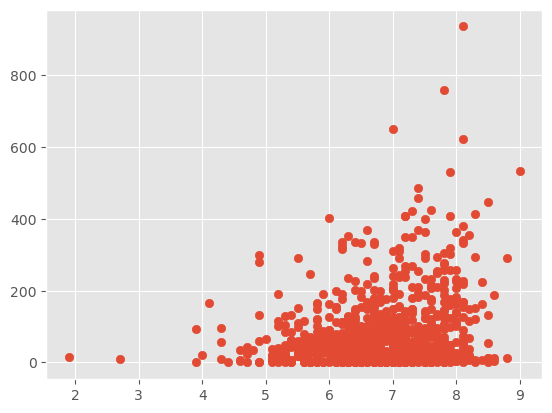

In [191]:
plt.scatter(df_merge.Rating, df_merge.Revenue_millions)
plt.show()

I want to see if longer duration always results in better rating.

In [193]:
df_merge['Rating'].corr(df_merge['Runtime_minutes'])

0.39221424552505135

Well, Let's plot this.

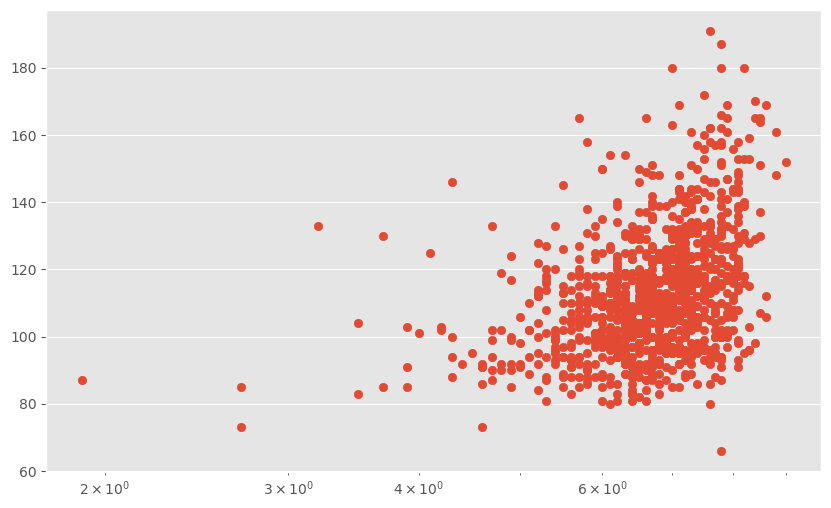

In [202]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 6))
ax.set(xscale="log")
plt.scatter(df_merge.Rating,df_merge.Runtime_minutes)
plt.show()
